In [147]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 15 15:34:27 2021

@author: hasan
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [148]:
df = pd.read_csv('/home/dll-1/Desktop/eeg/datasets/Adil paper/labels.csv')
df2 = pd.read_excel('./CASEINFO.xlsx')
df['recordname_clean'] = df['recordname'].str.replace('.edf', '')

# Convert 'recordname_clean' and 'Sern' columns to strings to ensure proper comparison
df['recordname_clean'] = df['recordname_clean'].astype(str)

df2['Sern'] = df2['Sern'].astype(str).str.zfill(df['recordname_clean'].str.len().max())

gender_mapping = {
    1: 'male',
    2: 'female'
}

# Convert 'gender' column using the mapping
df2['Gender'] = df2['Gender'].map(gender_mapping)
df = pd.merge(df, df2, left_on='recordname_clean', right_on='Sern', how='inner')

columns_to_drop = ['recordname_clean', 'Sern', 'Del','Name','Hand','CheckTime','Birthday','Montage','CheckDate','IDCase','IDCaseRoom','IDCaseDoor','IDCaseBed','IDCaseInHos',
                   'IDElePhy','SectionName','Address','Remark']  # Replace with your column names

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
# df['Age'] = df['Age'].astype(int)
# df['age'] = df['age'].astype(int)


# 1 male, 2 female

/tmp/ipykernel_546467/1598087552.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['recordname_clean'] = df['recordname'].str.replace('.edf', '')


In [149]:
df = df.sort_values(by='age', ascending=False)
df[0:20]

,recordname,label,age,loc,Gender,Age
0,0000485.edf,normal,93,test,male,93
2,0000414.edf,normal,84,train,male,84
1,0000611.edf,normal,84,test,female,84
3,0000085.edf,normal,79,train,female,79
4,0000625.edf,normal,78,train,female,78
5,0000989.edf,normal,76,train,male,76
6,0000860.edf,normal,76,train,female,76
7,0000505.edf,normal,76,train,male,76
8,0000566.edf,normal,74,train,male,74
9,0000419.edf,normal,74,train,male,74


In [151]:
male_norm = df.query('Gender=="male" and label=="normal"')
male_abnm = df.query('Gender=="male" and label=="abnormal"')
female_norm = df.query('Gender=="female" and label=="normal"')
female_abnm = df.query('Gender=="female" and label=="abnormal"')
n_bins = 21
d_labels = ['normal', 'abnormal']

In [152]:
'''-------------------Calculate Stats-------------------'''
mean_age = df.groupby(['Gender']).mean()

std_age = df.groupby(['Gender']).std()
mean_age_male = mean_age.loc['male']['Age']
std_age_male = std_age.loc['male']['Age']
n_male = len(male_norm) + len(male_abnm)
p_male_norm = (len(male_norm)/n_male)*100
p_male_abnm = 100 - p_male_norm

mean_age_female = mean_age.loc['female']['Age']
std_age_female = std_age.loc['female']['Age']
n_female = len(female_norm) + len(female_abnm)
p_female_norm = (len(female_norm)/n_female)*100
p_female_abnm = 100 - p_female_norm

p_male = (n_male/(n_male + n_female))*100
p_female = 100 - p_male


print(mean_age)

              age        Age
Gender                      
female  21.224832  21.224832
male    25.791339  25.790026


/tmp/ipykernel_546467/1988658895.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_age = df.groupby(['Gender']).mean()
/tmp/ipykernel_546467/1988658895.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_age = df.groupby(['Gender']).std()


[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


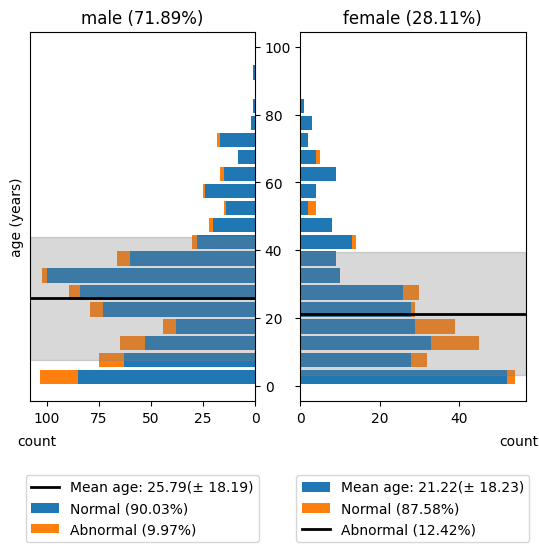

In [162]:

'''-------------------Plot Histograms------------------'''
bin_edges = np.linspace(start=0, stop = 100, num = n_bins, 
                         endpoint = True)
print(bin_edges)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist([male_norm.Age, male_abnm.Age], bins=bin_edges,
           rwidth=0.85,  orientation='horizontal', stacked=True)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_title(f'male ({p_male:0.2f}%)')
ax1.set_xlabel('count')
ax1.xaxis.set_label_coords(0.03, -0.09)
ax1.set_ylabel('age (years)')
ax2.hist([female_norm.age, female_abnm.age], bins=bin_edges,
           rwidth=0.85, orientation='horizontal', stacked=True, label=d_labels)
ax2.set_title(f'female ({p_female:0.2f}%)')
ax2.set_xlabel('count')
ax2.xaxis.set_label_coords(0.97, -0.09)

# '''-----------------Center Align yticklabels-------------'''
# y = [0, 20, 40, 60, 80, 100]
# ylbls = y
# ax1.set(yticks=y, yticklabels=[])
# for ycoord, ylbl in zip(y, ylbls):
#     ax1.annotate(ylbl, (0.51, ycoord), xycoords=('figure fraction', 'data'),
#                      ha='center', va='center')

'''-----------------Plot Mean line & Std-Dev ---------------------'''
xLims = ax1.get_xlim()
ax1.plot(xLims, [mean_age_male, mean_age_male], 'k-', lw=2)
ax1.legend([f'Mean age: {mean_age_male:.2f}(\u00B1 {std_age_male:.2f})',
             f'Normal ({p_male_norm:.2f}%)', 
             f'Abnormal ({p_male_abnm:.2f}%)'],
             loc='lower center',  bbox_to_anchor=(0.5,-0.4))
'''(Command below) Since ax1 goes from left-2-right, the (xy) coordinate 
represents the bottom right corner of rect instead of the bottom left corner
in the Rectangle documentation'''
ax1.add_patch(Rectangle((0, mean_age_male - std_age_male), 
                        xLims[0], 2*std_age_male, color="grey", alpha=0.3))
ax1.set_xlim(xLims) #Gets rids of empty space between rect and Figure end
xLims = ax2.get_xlim()
ax2.plot(xLims, [mean_age_female, mean_age_female], 'k-', lw=2)
ax2.legend([f'Mean age: {mean_age_female:.2f}(\u00B1 {std_age_female:.2f})',
             f'Normal ({p_female_norm:.2f}%)', 
             f'Abnormal ({p_female_abnm:.2f}%)'],
             loc='lower center',  bbox_to_anchor=(0.5,-0.4))

ax2.add_patch(Rectangle((0, mean_age_female - std_age_female), 
                        xLims[1], 2*std_age_female, color="grey", alpha=0.3))
ax2.set_xlim(xLims) #Gets rids of empty space between rect and Figure end
plt.show()
fig.savefig('PopPyramid_img.png', format='png', dpi=1200, bbox_inches='tight')